# EDA — Issue 1: inspección general y calidad básica

En este notebook se cubre el **Issue 1** del bloque de EDA:

- Cargar dataset (si no está ya cargado en memoria)
- Revisar dimensiones
- Identificar tipos de variables
- Visualización general de datos
- Conteo de nulos por variable
- Conteo de valores únicos por variable
- Identificación de columnas constantes o poco informativas

> Alcance: análisis descriptivo inicial, sin transformaciones relevantes para modelado.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

sns.set(style='whitegrid', context='notebook')

## 1) Carga del dataset

In [2]:
from pathlib import Path

path_candidates = [
    Path('../data/raw/handwriting_personality_large_dataset.csv'),  # ejecución desde /notebooks
    Path('data/raw/handwriting_personality_large_dataset.csv')      # ejecución desde raíz del repo
]

DATA_PATH = next((p for p in path_candidates if p.exists()), path_candidates[0])

# Si ya existe un DataFrame llamado `df`, reutilizamos esa carga.
if 'df' in globals() and isinstance(df, pd.DataFrame):
    print('Se reutiliza el DataFrame `df` ya cargado en memoria.')
    df = df.copy()
else:
    df = pd.read_csv(DATA_PATH)
    print(f'Dataset cargado desde: {DATA_PATH}')

print(f'Filas: {df.shape[0]:,} | Columnas: {df.shape[1]:,}')


Dataset cargado desde: ..\data\raw\handwriting_personality_large_dataset.csv
Filas: 2,000 | Columnas: 24


## 2) Exploración general

In [3]:
display(df.head())

display(df.sample(5, random_state=42))

,Handwriting_Sample,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
0,sample_1.jpg,60,0.357203,0.407442,0.724947,0.451517,0.255107,Male,45,0.146139,0.289895,0.283815,0.617406,0.996250,0.985927,0.745626,0.923922,0.039155,0.277361,0.832098,0.319128,0.199213,0.241081,0.375978
1,sample_2.jpg,32,0.730250,0.051950,0.351615,0.528413,0.664159,Male,36,0.802833,0.548934,0.459319,0.793432,0.563419,0.893979,0.114380,0.484167,0.022397,0.436322,0.908627,0.220744,0.650947,0.568464,0.660062
2,sample_3.jpg,10,0.836987,0.162227,0.164681,0.816008,0.681870,Other,34,0.452513,0.441706,0.844920,0.601960,0.480748,0.941274,0.950571,0.485661,0.277388,0.873560,0.566973,0.205402,0.537800,0.323519,0.373358
3,sample_4.jpg,12,0.413419,0.363059,0.131564,0.938350,0.236702,Male,26,0.832662,0.279283,0.748974,0.798155,0.952190,0.831041,0.217244,0.351701,0.464859,0.867758,0.298407,0.350210,0.591122,0.802049,0.131324
4,sample_5.jpg,11,0.616046,0.247899,0.909740,0.698966,0.463774,Other,57,0.927785,0.852798,0.944789,0.772620,0.520305,0.797505,0.186378,0.113623,0.299514,0.295555,0.365065,0.210633,0.723195,0.044085,0.014351


,Handwriting_Sample,Writing_Speed_wpm,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,Gender,Age,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15
1860,sample_1861.jpg,15,0.063028,0.605022,0.945696,0.209358,0.337997,Male,27,0.671829,0.382947,0.117586,0.189688,0.173706,0.931554,0.396820,0.200499,0.591010,0.000843,0.180955,0.262861,0.708444,0.426065,0.314487
353,sample_354.jpg,35,0.091319,0.385361,0.652216,0.675137,0.640369,Other,32,0.184512,0.281836,0.204847,0.646131,0.000915,0.553886,0.248207,0.588778,0.606610,0.292456,0.223096,0.635448,0.034093,0.861568,0.708746
1333,sample_1334.jpg,29,0.351200,0.302766,0.536508,0.214814,0.983955,Female,28,0.080804,0.679529,0.938274,0.309255,0.802718,0.286318,0.616569,0.550409,0.047632,0.471366,0.572428,0.997340,0.226438,0.390531,0.253682
905,sample_906.jpg,10,0.597779,0.020622,0.073839,0.253786,0.416446,Female,40,0.313080,0.370893,0.122922,0.022015,0.579985,0.398439,0.943286,0.978641,0.742468,0.764561,0.255125,0.857862,0.403383,0.721271,0.577275
1289,sample_1290.jpg,12,0.153548,0.271938,0.688487,0.504197,0.232711,Male,28,0.517119,0.540560,0.682675,0.791722,0.853486,0.246679,0.694375,0.341836,0.431014,0.443608,0.944105,0.805921,0.381379,0.336873,0.785854


In [4]:
print('Dimensiones del dataset (filas, columnas):', df.shape)
print()
print('Información general:')
df.info()


Dimensiones del dataset (filas, columnas): (2000, 24)

Información general:
<class 'pandas.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Handwriting_Sample  2000 non-null   str    
 1   Writing_Speed_wpm   2000 non-null   int64  
 2   Openness            2000 non-null   float64
 3   Conscientiousness   2000 non-null   float64
 4   Extraversion        2000 non-null   float64
 5   Agreeableness       2000 non-null   float64
 6   Neuroticism         2000 non-null   float64
 7   Gender              2000 non-null   str    
 8   Age                 2000 non-null   int64  
 9   Feature_1           2000 non-null   float64
 10  Feature_2           2000 non-null   float64
 11  Feature_3           2000 non-null   float64
 12  Feature_4           2000 non-null   float64
 13  Feature_5           2000 non-null   float64
 14  Feature_6           2000 non-null   flo

## 3) Tipos de variables

In [5]:
dtypes_df = (
    df.dtypes
    .astype(str)
    .reset_index()
    .rename(columns={'index': 'variable', 0: 'dtype'})
)

display(dtypes_df)

print('Resumen por tipo de dato:')
print(dtypes_df['dtype'].value_counts())

,variable,dtype
0,Handwriting_Sample,str
1,Writing_Speed_wpm,int64
2,Openness,float64
3,Conscientiousness,float64
4,Extraversion,float64
5,Agreeableness,float64
6,Neuroticism,float64
7,Gender,str
8,Age,int64
9,Feature_1,float64


Resumen por tipo de dato:
dtype
float64    20
str         2
int64       2
Name: count, dtype: int64


In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f'Variables numéricas ({len(numeric_cols)}): {numeric_cols}')
print(f'Variables categóricas/bool ({len(categorical_cols)}): {categorical_cols}')

Variables numéricas (22): ['Writing_Speed_wpm', 'Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism', 'Age', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15']
Variables categóricas/bool (2): ['Handwriting_Sample', 'Gender']


C:\Users\yeray\AppData\Local\Temp\ipykernel_24036\3657754620.py:2: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()


## 4) Visualización descriptiva general

In [7]:
# Estadísticos generales (incluyendo categóricas)
display(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Handwriting_Sample,2000,2000,sample_1.jpg,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Writing_Speed_wpm,2000.0,NaN,NaN,NaN,34.9,14.768414,10.0,22.0,35.0,48.0,60.0
Openness,2000.0,NaN,NaN,NaN,0.503219,0.28772,0.000037,0.254561,0.50895,0.751699,0.999517
Conscientiousness,2000.0,NaN,NaN,NaN,0.502095,0.29196,0.000605,0.246555,0.50416,0.762965,0.999958
Extraversion,2000.0,NaN,NaN,NaN,0.493354,0.293293,0.000198,0.243421,0.476727,0.752892,0.999905
Agreeableness,2000.0,NaN,NaN,NaN,0.49068,0.292162,0.000789,0.233976,0.483812,0.746059,0.999878
Neuroticism,2000.0,NaN,NaN,NaN,0.503803,0.292868,0.00011,0.247184,0.507146,0.762267,0.999999
Gender,2000,3,Other,693,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2000.0,NaN,NaN,NaN,38.7515,12.529734,18.0,28.0,39.0,50.0,60.0
Feature_1,2000.0,NaN,NaN,NaN,0.503997,0.287304,0.000479,0.26152,0.502912,0.756874,0.999336


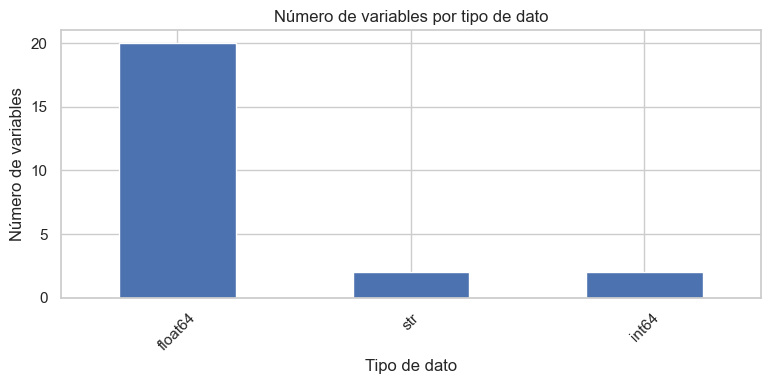

In [8]:
# Distribución de tipos de variables
plt.figure(figsize=(8, 4))
(dtypes_df['dtype'].value_counts()).plot(kind='bar')
plt.title('Número de variables por tipo de dato')
plt.xlabel('Tipo de dato')
plt.ylabel('Número de variables')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 5) Calidad básica: valores nulos

In [9]:
nulls_abs = df.isna().sum()
nulls_pct = (nulls_abs / len(df) * 100).round(2)

nulls_report = (
    pd.DataFrame({'nulos': nulls_abs, 'pct_nulos': nulls_pct})
    .sort_values(['nulos', 'pct_nulos'], ascending=False)
)

display(nulls_report)

print('Variables con al menos 1 nulo:')
display(nulls_report[nulls_report['nulos'] > 0])

,nulos,pct_nulos
Handwriting_Sample,0,0.0
Writing_Speed_wpm,0,0.0
Openness,0,0.0
Conscientiousness,0,0.0
Extraversion,0,0.0
Agreeableness,0,0.0
Neuroticism,0,0.0
Gender,0,0.0
Age,0,0.0
Feature_1,0,0.0


Variables con al menos 1 nulo:


,nulos,pct_nulos


## 6) Valores únicos por variable

In [10]:
unique_abs = df.nunique(dropna=False)
unique_pct = (unique_abs / len(df) * 100).round(2)

unique_report = (
    pd.DataFrame({'valores_unicos': unique_abs, 'pct_unicos_sobre_filas': unique_pct})
    .sort_values('valores_unicos', ascending=False)
)

display(unique_report)

,valores_unicos,pct_unicos_sobre_filas
Handwriting_Sample,2000,100.00
Openness,2000,100.00
Conscientiousness,2000,100.00
Extraversion,2000,100.00
Neuroticism,2000,100.00
Agreeableness,2000,100.00
Feature_2,2000,100.00
Feature_1,2000,100.00
Feature_12,2000,100.00
Feature_9,2000,100.00


## 7) Columnas constantes o poco informativas

In [11]:
# Columnas constantes (1 valor único incluyendo NaN)
constant_cols = unique_abs[unique_abs <= 1].index.tolist()

# Heurística: columnas de muy baja variabilidad (<=1% de valores únicos respecto al total)
low_info_threshold = 1.0
low_info_cols = unique_report[
    unique_report['pct_unicos_sobre_filas'] <= low_info_threshold
].index.tolist()

print(f'Columnas constantes: {constant_cols if constant_cols else "Ninguna"}')
print(f'Columnas potencialmente poco informativas (<= {low_info_threshold}% valores únicos):')
print(low_info_cols if low_info_cols else 'Ninguna')

if low_info_cols:
    display(unique_report.loc[low_info_cols].sort_values('pct_unicos_sobre_filas'))

Columnas constantes: Ninguna
Columnas potencialmente poco informativas (<= 1.0% valores únicos):
['Gender']


,valores_unicos,pct_unicos_sobre_filas
Gender,3,0.15


## 8) Conclusiones iniciales (Issue 1)

- Se validó la estructura general del dataset (tamaño y tipos de variables).
- Se revisó visualmente una muestra y estadísticas descriptivas básicas.
- Se generó un reporte de nulos por variable.
- Se generó un reporte de cardinalidad por variable.
- Se identificaron columnas constantes y columnas candidatas a ser poco informativas.

Con esto queda completo el **Issue 1** y el dataset listo para continuar con limpieza inicial en el siguiente apartado del EDA.
